# Lab 5: Web Scraping, APIs, and Topic Modeling


## Part 3: Accessing Structured Data with APIs - The Reddit Case Study (PRAW)

Sometimes, websites *want* you to access their data programmatically and provide an **API** (Application Programming Interface). This is like a formal contract: you make requests in a specific format, and the website returns structured data (often in JSON format), without you needing to parse messy HTML. It's generally more reliable and efficient than scraping when available.

**Reddit** has a popular API, and the **PRAW** (Python Reddit API Wrapper) library makes using it incredibly easy.

**Why use PRAW instead of scraping Reddit?**
*   **Reliability:** Reddit's HTML structure can change often, breaking scrapers. The API structure is much more stable.
*   **Efficiency:** APIs usually return exactly the data you need, often faster than downloading and parsing large HTML pages.
*   **Rate Limits & Rules:** PRAW helps manage API usage limits automatically, preventing you from getting blocked (as easily). Scraping might violate Reddit's Terms of Service if done improperly.
*   **Functionality:** PRAW lets you not only *read* data but also interact (comment, upvote, post, etc.) if you authenticate properly.

Let's set up PRAW! You'll need Reddit API credentials.

**Steps to get Reddit API Credentials:**
1.  Log in to your Reddit account.
2.  Go to: `https://www.reddit.com/prefs/apps`
3.  Scroll down and click "are you a developer? create an app..."
4.  Fill in the form:
    *   **Name:** Give your script a unique name (e.g., `TimișoaraDataMiningLab`).
    *   **Type:** Select `script`.
    *   **Description:** (Optional)
    *   **About URL:** (Optional)
    *   **Redirect URI:** For script apps, `http://localhost:8080` is commonly used (it won't actually be used for simple data fetching).
5.  Click "create app".
6.  You'll see your app listed. Note down the **client ID** (under the app name) and the **client secret**.
7.  Also, create a **user agent** string. It should be unique and descriptive, including your Reddit username. Format: `<platform>:<app_id>:<version> (by /u/<your_reddit_username>)` e.g., `python:TimișoaraDataMiningLab:v1.0 (by /u/YourUsernameHere)`

In [5]:
# @title Installing and Setting up PRAW
!pip install praw pandas --quiet
import praw
import pandas as pd
import warnings

# Ignore PRAW's specific warning about async deprecation if not using async features heavily
warnings.filterwarnings("ignore", category=DeprecationWarning, module='praw')

# --- !!! IMPORTANT !!! ---
# Replace placeholders with your actual Reddit API Credentials
# It's best practice NOT to hardcode credentials directly in scripts.
# Consider using environment variables or a config file in real projects.
CLIENT_ID = '3xKMNU3l7Uu_YNsUFUjB-g' # Paste your client ID
CLIENT_SECRET = 'wJQ1FhdcwNPHFbMQNabUZOERLZreVg' # Paste your client secret
USER_AGENT = 'python:TimișoaraDataMiningLab' # Customize with your app name and username

# For demonstration purposes ONLY, here are dummy credentials (replace with your own!)
# DO NOT USE THESE FOR ACTUAL SCRAPING - THEY LIKELY WON'T WORK OR ARE RATE-LIMITED
DEMO_CLIENT_ID = 'sIXZTihLNiKiHw'
DEMO_CLIENT_SECRET = 'EjfAsmz5z8mDbZohe4UPYTPIZsYmOQ'
DEMO_USER_AGENT = 'TestAgentPraw:v1 (by /u/TemporaryUser)'

try:
    # Create a Reddit instance (read-only is sufficient for fetching posts)
    # Set check_for_async=False if you are running in a synchronous environment like default Colab/Jupyter cells
    # reddit = praw.Reddit(
    #     client_id=CLIENT_ID,
    #     client_secret=CLIENT_SECRET,
    #     user_agent=USER_AGENT,
    #     check_for_async=False # Important for standard notebooks
    # )

    # For the sake of example, below you have a test user created for you. Please try to switch to your actual user asap
    reddit = praw.Reddit(client_id='sIXZTihLNiKiHw',
                     client_secret='EjfAsmz5z8mDbZohe4UPYTPIZsYmOQ',
                     user_agent='Test1', check_for_async=False)

    # Verify connection by checking the read-only status
    print(f"PRAW instance created. Read-only: {reddit.read_only}")
    # You can optionally fetch something small to fully verify, like the site name
    print(f"Connected to Reddit site: {reddit.config.reddit_url}")

except Exception as e:
    print(f"Error creating PRAW instance: {e}")
    print("Please ensure you have replaced the placeholder credentials with your actual ones.")
    print("Using dummy credentials for demonstration purposes (might not work).")
    # Fallback to dummy credentials for code execution (will likely fail on real requests)
    reddit = praw.Reddit(client_id=DEMO_CLIENT_ID,
                        client_secret=DEMO_CLIENT_SECRET,
                        user_agent=DEMO_USER_AGENT,
                        check_for_async=False)
    print(f"PRAW instance created with dummy credentials. Read-only: {reddit.read_only}")

PRAW instance created. Read-only: True
Connected to Reddit site: https://www.reddit.com


In [6]:
# @title Fetching Hot Posts from a Subreddit

# Let's explore the r/Romania subreddit
target_subreddit = 'Romania'
post_limit = 10

print(f"\nFetching the top {post_limit} 'hot' posts from r/{target_subreddit}...")

try:
    if reddit.read_only is False and CLIENT_ID == 'YOUR_CLIENT_ID_HERE':
         print("\nWARNING: Using placeholder credentials. Fetching might fail.")

    # Get the subreddit instance
    subreddit = reddit.subreddit(target_subreddit)

    # Fetch hot posts
    hot_posts = subreddit.hot(limit=post_limit)

    # Iterate and print post titles and scores
    for post in hot_posts:
        # post.title is the title, post.score is the upvote count
        # post.stickied indicates if it's a pinned mod post
        print(f"- {'[STICKIED] ' if post.stickied else ''}{post.title} (Score: {post.score})")

except Exception as e:
    print(f"\nError fetching posts from r/{target_subreddit}: {e}")
    if "401" in str(e):
        print("This might be due to invalid API credentials.")
    elif "404" in str(e):
         print(f"Subreddit r/{target_subreddit} might not exist or is private.")
    else:
        print("Check your internet connection or API credentials.")


Fetching the top 10 'hot' posts from r/Romania...
- [STICKIED] Forum Liber - Întrebați și discutați cu /r/Romania Orice - 05.05.2025 (Score: 1)
- [STICKIED] MEGATHREAD Alegeri prezidențiale turul I (4 Mai 2025) (Score: 171)
- Marketing d-ala blanao (Score: 343)
- It's gone =)) (Score: 1229)
- Marketing (Score: 150)
- Demagogie vs. matematică (Score: 128)
- De doi ani în cazul fetei violate la școala de vară AUR nu se face nimic. Avocată: E un partid cu o solidă componentă militarizată, profund înfiptă în sistem - spotmedia.ro (Score: 158)
- Ce interesat e Dughin de Simion, il pune direct la pinned (Score: 112)
- Simion e ăla care coboară împreună cu portofelul tău la prima. Nu și cu țara. (Score: 617)
- Portrete virtuale pe 500 de votanti Simion/Georgescu - Text preluat de pe Facebook (Score: 109)


In [7]:
# @title Fetching Posts and Creating a DataFrame
from datetime import datetime

# Let's get more data and put it into a structured format
target_subreddit = 'programare' # Maybe a Romanian programming subreddit?
post_limit = 15 # Get a few more posts
fetch_mode = 'top' # Let's get 'top' posts (options: 'hot', 'new', 'top', 'controversial')
time_filter = 'month' # For 'top' and 'controversial', specify time: 'all', 'year', 'month', 'week', 'day', 'hour'

print(f"\nFetching the {fetch_mode} {post_limit} posts from r/{target_subreddit} (time filter: {time_filter})...")

posts_data = []

try:
    if reddit.read_only is False and CLIENT_ID == 'YOUR_CLIENT_ID_HERE':
         print("\nWARNING: Using placeholder credentials. Fetching might fail.")

    subreddit = reddit.subreddit(target_subreddit)

    # Use the specified fetch mode and time filter
    if fetch_mode == 'hot':
        post_iterator = subreddit.hot(limit=post_limit)
    elif fetch_mode == 'new':
        post_iterator = subreddit.new(limit=post_limit)
    elif fetch_mode == 'top':
        post_iterator = subreddit.top(time_filter=time_filter, limit=post_limit)
    elif fetch_mode == 'controversial':
         post_iterator = subreddit.controversial(time_filter=time_filter, limit=post_limit)
    else:
        print(f"Invalid fetch_mode: {fetch_mode}. Defaulting to 'hot'.")
        post_iterator = subreddit.hot(limit=post_limit)


    for post in post_iterator:
        # Convert UTC timestamp to readable datetime
        post_time = datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S UTC')

        posts_data.append([
            post.title,
            post.score,
            post.id,
            post.subreddit.display_name, # Get subreddit name
            post.url, # URL of the post
            post.num_comments,
            post.selftext, # The body text of the post (if it's a text post)
            post_time # Use the converted time
        ])

    # Create DataFrame
    posts_df = pd.DataFrame(posts_data, columns=[
        'title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created_time'
    ])

    print(f"\nSuccessfully fetched {len(posts_df)} posts.")
    print("--- Sample Posts DataFrame ---")
    display(posts_df.head())

except Exception as e:
    print(f"\nError fetching posts: {e}")


Fetching the top 15 posts from r/programare (time filter: month)...


KeyboardInterrupt: 

In [ ]:
# @title Accessing Comments of a Specific Post

# Let's get a specific post using its ID or URL (find one from the DataFrame above)
# Example using an ID (replace with a valid ID from your fetched posts_df)
example_post_id = None
if 'posts_df' in locals() and not posts_df.empty:
    example_post_id = posts_df['id'].iloc[0] # Get the ID of the first post fetched

# Or use a direct URL:
# example_post_url = "https://www.reddit.com/r/Romania/comments/1b...../" # Replace with a real URL

if example_post_id:
    print(f"\nFetching comments for post ID: {example_post_id}")
    try:
        submission = reddit.submission(id=example_post_id)
        # submission = reddit.submission(url=example_post_url) # Alternative

        print(f"Post Title: {submission.title}")
        print(f"Fetching top-level comments (limit 10 for preview)...")

        # Accessing comments - initial fetch might not get all replies
        comment_limit = 10
        count = 0
        submission.comments.replace_more(limit=0) # Load top-level comments, don't expand replies yet

        for top_level_comment in submission.comments:
             if count >= comment_limit:
                 break
             # Check if it's a Comment object (not MoreComments placeholder)
             if isinstance(top_level_comment, praw.models.Comment):
                 print(f"\n[Score: {top_level_comment.score}] Comment by u/{top_level_comment.author}")
                 # Limit comment body length for preview
                 comment_body = top_level_comment.body.replace('\n', ' ')[:150]
                 print(f"  '{comment_body}...'" )
                 count += 1
             # elif isinstance(top_level_comment, praw.models.MoreComments):
             #     print("\n[MoreComments object - potential replies exist]") # Placeholder for more comments

    except Exception as e:
        print(f"\nError fetching comments for post {example_post_id}: {e}")
else:
    print("\nCannot fetch comments: No example_post_id found. Run the previous cell first.")

### Exercise 3: Subreddit Engagement Analysis 📊💬

**Goal:** Analyze the relationship between post score and comment activity in a subreddit of your choice using PRAW.

**Tasks:**

1.  **Choose Subreddit & Fetch Data:**
    *   Select a subreddit that interests you (e.g., `r/europe`, `r/AskReddit`, `r/technology`, `r/gaming`, `r/datascience`) - pick something with enough activity!).
    *   Fetch the **top 100 posts of all time** (`.top('all', limit=100)`) from your chosen subreddit.
    *   Create a Pandas DataFrame containing: `title`, `score`, `id`, `subreddit`, `url`, `num_comments`, `body` (selftext), and `created_time` for these 100 posts.
2.  **Analyze Engagement:**
    *   Sort the DataFrame by `score` in descending order.
    *   Calculate the **average score** and **average number of comments** for the **top 10** posts (highest scores).
    *   Calculate the **average score** and **average number of comments** for the **bottom 10** posts (lowest scores *within your top 100 sample*).
    *   Print these averages clearly.
    *   **Discuss:** Based on these averages, is there a clear correlation between score and comment count in this sample? Do higher-scored posts *always* get more comments? What might explain the relationship (or lack thereof)?
3.  **Visualize Title Keywords:**
    *   Combine all 100 post `title` strings into one large text blob.
    *   Tokenize the text (split into words).
    *   Convert words to lowercase.
    *   Remove common English **stop words** (like 'the', 'a', 'is', 'in') and potentially some common Romanian ones if applicable ('de', 'si', 'o', 'un', 'cu', etc.). Also remove short words (e.g., length < 3) and non-alphabetic tokens.
    *   Calculate the frequency of the remaining words.
    *   Plot a bar chart showing the **top 10 most frequent words** found in the titles.

**Hints:**
*   Use `pandas` for DataFrame manipulation and calculations (`.sort_values()`, `.head()`, `.tail()`, `.mean()`).
*   For text processing and visualization:
    *   Use `nltk.corpus.stopwords` for English stop words (`nltk.download('stopwords')` might be needed). You might need to create a custom list for Romanian stop words.
    *   Use `nltk.tokenize.word_tokenize` or simply `text.split()` for tokenization (`nltk.download('punkt')` might be needed for the tokenizer).
    *   Use `collections.Counter` or `pandas.Series.value_counts()` for word frequency.
    *   Use `matplotlib.pyplot` or `seaborn` for plotting the bar chart. Remember to label your axes!

In [5]:
import praw
import pandas as pd

CLIENT_ID = '3xKMNU3l7Uu_YNsUFUjB-g'
CLIENT_SECRET = 'wJQ1FhdcwNPHFbMQNabUZOERLZreVg'
USER_AGENT = 'MyRedditApp/1.0'

reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent=USER_AGENT
)

subreddit_name = "datascience"
subreddit = reddit.subreddit(subreddit_name)

top_posts = subreddit.top('all', limit=100)

data = []
for post in top_posts:
    data.append({
        "title": post.title,
        "score": post.score,
        "id": post.id,
        "subreddit": post.subreddit.display_name,
        "url": post.url,
        "num_comments": post.num_comments,
        "body": post.selftext,
        "created_time": post.created_utc
    })

df = pd.DataFrame(data)

print(df.head())



C:\Users\marog\AppData\Local\Temp\ipykernel_26776\2768422527.py:17: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  top_posts = subreddit.top('all', limit=100)


                                               title  score      id  \
0                                         data siens   4115  k8nyf8   
1                            The pain and excitement   3915  oeg6nl   
2  Shout Out to All the Mediocre Data Scientists ...   3633  hohvgq   
3                              Let's keep this on...   3600  xdv6nz   
4    Guys, we’ve been doing it wrong this whole time   3462  tj3kek   

     subreddit                                                url  \
0  datascience  https://dslntlv9vhjr4.cloudfront.net/posts_ima...   
1  datascience                https://i.redd.it/yqnunwryjg971.jpg   
2  datascience  https://www.reddit.com/r/datascience/comments/...   
3  datascience                https://i.redd.it/k102dyo0yrn91.jpg   
4  datascience                    https://i.imgur.com/TAex5zG.jpg   

   num_comments                                               body  \
0            72                                                      
1           175   

In [10]:
# Sort the DataFrame by score in descending order
sorted_df = df.sort_values(by="score", ascending=False)

# Calculate averages for the top 10 posts
top_10 = sorted_df.head(10)
top_10_avg_score = top_10["score"].mean()
top_10_avg_comments = top_10["num_comments"].mean()

# Calculate averages for the bottom 10 posts
bottom_10 = sorted_df.tail(10)
bottom_10_avg_score = bottom_10["score"].mean()
bottom_10_avg_comments = bottom_10["num_comments"].mean()

# Print results
print("Top 10 Posts:")
print(f"Average Score: {top_10_avg_score}")
print(f"Average Number of Comments: {top_10_avg_comments}\n")

print("Bottom 10 Posts:")
print(f"Average Score: {bottom_10_avg_score}")
print(f"Average Number of Comments: {bottom_10_avg_comments}\n")

# Discussion
print("Discussion: Based on the analysis, does a higher score correlate with more comments?")
print("Provide your interpretation based on the averages above.")


Top 10 Posts:
Average Score: 3524.4
Average Number of Comments: 150.5

Bottom 10 Posts:
Average Score: 1269.3
Average Number of Comments: 70.5

Discussion: Based on the analysis, does a higher score correlate with more comments?
Provide your interpretation based on the averages above.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marog\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 Words in Titles:
data: 32
science: 12
job: 8
scientist: 6
like: 5
get: 5
time: 4
meme: 4
learning: 4
think: 3


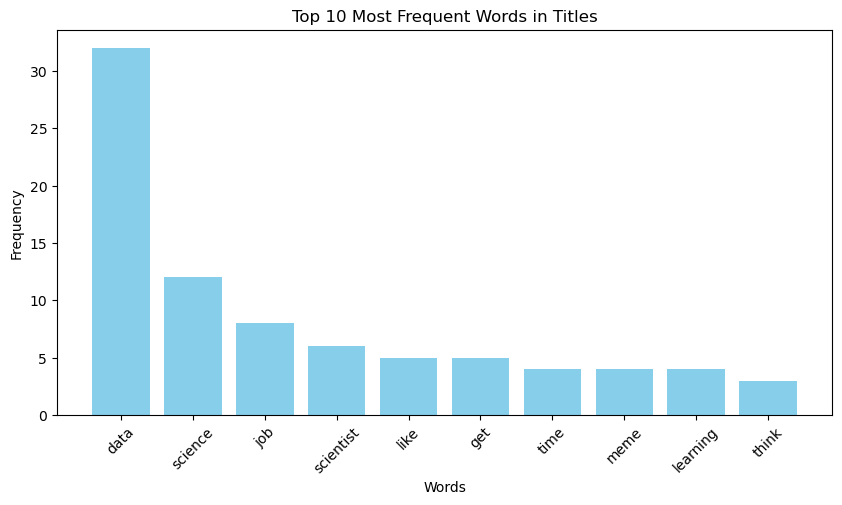

In [11]:
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import nltk

# Combine all titles into a single text blob
all_titles = " ".join(df["title"])

# Tokenize words
words = all_titles.lower().split()

# Download NLTK stopwords if not already done
nltk.download("stopwords")

# Remove stop words, short words, and non-alphabetic words
stop_words = set(stopwords.words("english"))
# Add Romanian stop words if necessary
stop_words.update(["de", "si", "o", "un", "cu"])
cleaned_words = [
    word for word in words if word.isalpha() and word not in stop_words and len(word) > 2
]

# Count word frequency
word_freq = Counter(cleaned_words)

# Get the 10 most common words
most_common_words = word_freq.most_common(10)

# Print the words and their frequencies
print("Top 10 Words in Titles:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

# Visualize the top 10 words
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color="skyblue")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Words in Titles")
plt.xticks(rotation=45)
plt.show()


## Part 4: Topic Modeling with LDA - Uncovering Hidden Themes

Imagine you have thousands of Reddit comments, news articles, or customer reviews. How can you quickly understand the main topics being discussed without reading everything? **Topic Modeling** helps us do just that!

It's an **unsupervised machine learning** technique that analyzes a collection of documents (our "corpus") and automatically identifies clusters of words that tend to appear together, representing underlying **topics** or themes.

**Latent Dirichlet Allocation (LDA)** is one of the most popular algorithms for topic modeling.

**The Core Idea of LDA:**
1.  It assumes each **document** is a mixture of different **topics**.
2.  It assumes each **topic** is a mixture of different **words**.
3.  LDA's goal is to figure out these mixtures: which topics are present in each document, and which words are important for each topic.

Think of it like sorting a pile of mixed LEGO bricks: LDA tries to figure out which bricks (words) belong to which type of model (topic), and how many models (topics) are represented in each sub-pile (document).

**Applications:**
*   Summarizing large text datasets.
*   Discovering themes in customer feedback or social media.
*   Organizing scientific articles or news reports.
*   Recommending content based on thematic similarity.

### Text Preprocessing: Cleaning the Data for LDA

LDA works best with clean, processed text. Common steps include:

1.  **Tokenization:** Splitting text into individual words or tokens.
2.  **Lowercasing:** Converting all text to lowercase to treat "Topic" and "topic" the same.
3.  **Removing Stop Words:** Eliminating common words (like "the", "is", "in", "și", "cu") that don't carry much specific meaning.
4.  **Removing Punctuation/Numbers:** Often removes non-alphabetic characters unless they are specifically relevant.
5.  **Stemming / Lemmatization:** Reducing words to their root form.
    *   **Stemming:** Chops off word endings (e.g., "running" -> "run", "studies" -> "studi"). It's faster but can sometimes create non-words. (Uses algorithms like PorterStemmer).
    *   **Lemmatization:** Considers the word's context and dictionary form (lemma) to find the root (e.g., "running" -> "run", "studies" -> "study", "better" -> "good"). It's usually more accurate but slower. Requires knowledge of the word's part-of-speech (verb, noun, etc.). (Uses tools like WordNetLemmatizer).

Lemmatization is often preferred for topic modeling as it produces actual words, making topics more interpretable.

In [ ]:
# @title Stemming vs. Lemmatization Example

import nltk
# Ensure necessary NLTK data is downloaded
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/wordnet')
    nltk.data.find('taggers/averaged_perceptron_tagger') # Needed for POS tagging for lemmatization
except LookupError:
    print("Downloading NLTK data (punkt, wordnet, averaged_perceptron_tagger)...")
    nltk.download('punkt', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('averaged_perceptron_tagger', quiet=True)
    nltk.download('averaged_perceptron_tagger_eng')


from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet # To get part-of-speech for lemmatizer

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Helper function to map NLTK POS tags to WordNet POS tags
def nltk_pos_to_wordnet_pos(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

words_to_process = ["running", "studies", "better", "programming", "computers", "historical"]

print("--- Stemming vs. Lemmatization ---")

for word in words_to_process:
    # Stemming (simple)
    stemmed_word = stemmer.stem(word)

    # Lemmatization (needs Part-of-Speech)
    # 1. Get the NLTK POS tag
    nltk_pos_tag = nltk.pos_tag([word])[0][1]
    # 2. Convert to WordNet POS tag
    wordnet_tag = nltk_pos_to_wordnet_pos(nltk_pos_tag)
    # 3. Lemmatize with the POS tag (default is noun if no tag or unknown)
    if wordnet_tag is None:
        lemmatized_word = lemmatizer.lemmatize(word) # Default to noun
    else:
        lemmatized_word = lemmatizer.lemmatize(word, pos=wordnet_tag)


    print(f"Original: {word:<15} | POS Tag: {nltk_pos_tag:<5} | Stemmed: {stemmed_word:<15} | Lemmatized: {lemmatized_word:<15}")

print("\nNotice how lemmatization produces real words ('study', 'good') while stemming can be cruder ('studi', 'better').")

In [ ]:
# @title Fetching Example Documents (Wikipedia Articles)

# For demonstrating LDA, let's grab content from a few distinct Wikipedia pages.
!pip install wikipedia-api scikit-learn --quiet
import wikipediaapi
import nltk
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("Downloading NLTK stopwords data...")
    nltk.download('stopwords', quiet=True)

# Set up Wikipedia API
# Using a custom user agent is good practice
# --- CORRECTED User-Agent ---
wiki_wiki = wikipediaapi.Wikipedia(
    language='en',
    extract_format=wikipediaapi.ExtractFormat.WIKI,
    user_agent='TimisoaraDataMiningLab/1.0 (educational)'
)

# Define article titles for different topics
article_titles = {
    "Religion & Philosophy": ["Religion", "Stoicism"],
    "Science & Technology": ["Artificial intelligence", "Quantum computing"],
    "Arts & History": ["Mona Lisa", "History of Romania"],
    "Nature & Geography": ["Carpathian Mountains", "Danube Delta"]
}

documents_dict = {}
print("Fetching Wikipedia articles...")

for category, titles in article_titles.items():
    print(f"  Category: {category}")
    for title in titles:
        page = wiki_wiki.page(title)
        # The error occurred on the next line because the request triggered by page.exists()
        # included the problematic User-Agent header.
        if page.exists():
            print(f"    - Fetched '{title}' ({len(page.text)} chars)")
            documents_dict[title] = page.text
        else:
            print(f"    - Could not find page '{title}'")

# Combine into a list for processing
documents = list(documents_dict.values())
document_names = list(documents_dict.keys()) # Keep track of names

print(f"\nFetched content for {len(documents)} articles.")

In [ ]:
# @title Preprocessing the Text Documents

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re
import string

# Ensure necessary NLTK data is downloaded
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/wordnet')
    nltk.data.find('taggers/averaged_perceptron_tagger')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('punkt_tab')
except LookupError:
    print("Downloading necessary NLTK data...")
    nltk.download('punkt', quiet=True)
    nltk.download('punkt_tab')
    nltk.download('wordnet', quiet=True)
    nltk.download('averaged_perceptron_tagger', quiet=True)
    nltk.download('stopwords', quiet=True)


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Add some common wiki markup/noise to stopwords
stop_words.update(['ref', 'cite', 'name', 'http', 'https', 'www', 'com', 'org', 'html', 'also', 'may', 'use', 'first', 'one', 'see', 'page', 'article'])

# Helper function to get WordNet POS tag (from Cell 26)
def nltk_pos_to_wordnet_pos(nltk_tag):
    if nltk_tag.startswith('J'): return wordnet.ADJ
    elif nltk_tag.startswith('V'): return wordnet.VERB
    elif nltk_tag.startswith('N'): return wordnet.NOUN
    elif nltk_tag.startswith('R'): return wordnet.ADV
    else: return None

def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # 3. Remove wiki markup like [[File:...]], {{...}}, ==...== etc.
    text = re.sub(r'\[\[(?:[^\]|]*\|)?([^\]|]*)\]\]', r'\1', text) # Keep link text [[Category:Foo|Bar]] -> Bar
    text = re.sub(r'\{\{[^}]*\}\}', '', text) # Remove templates {{...}}
    text = re.sub(r'==\s*[^=]*\s*==', '', text) # Remove section headings == ... ==
    text = re.sub(r"\'\'\'?|\'\'", '', text) # Remove bold/italic ''', ''
    # 4. Remove punctuation and numbers
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
    # 5. Tokenize
    tokens = word_tokenize(text)
    # 6. Get POS tags
    pos_tags = nltk.pos_tag(tokens)
    # 7. Lemmatize and remove stopwords/short words
    lemmatized_tokens = [
        lemmatizer.lemmatize(word, pos=nltk_pos_to_wordnet_pos(tag) or wordnet.NOUN) # Default to noun if POS unknown
        for word, tag in pos_tags
        if word.isalpha() and len(word) > 2 and word not in stop_words
    ]
    return ' '.join(lemmatized_tokens)

print("Preprocessing documents...")
preprocessed_documents = [preprocess_text(doc) for doc in documents]
print("Preprocessing complete.")

# Display snippet of the first preprocessed document
print("\n--- Snippet of first preprocessed document ---")
print(preprocessed_documents[0][:500] + "...")

In [ ]:
# @title Creating the Document-Term Matrix (DTM)

from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer converts text into a matrix of token counts.
# max_df: Ignore terms that appear in more than X% of the documents (too common)
# min_df: Ignore terms that appear in less than Y documents (too rare)
# ngram_range: Consider single words (1,1), or words and pairs (1,2), etc.
vectorizer = CountVectorizer(max_df=0.85, min_df=3, ngram_range=(1, 2)) # Consider single words and bigrams

# Fit the vectorizer to the preprocessed documents and transform them into a matrix
# Rows = documents, Columns = unique terms (words/ngrams), Values = counts
dtm = vectorizer.fit_transform(preprocessed_documents)

print(f"Document-Term Matrix created with shape: {dtm.shape}")
print(f"(Documents: {dtm.shape[0]}, Unique Terms/Ngrams: {dtm.shape[1]})")

# Get the actual terms (feature names)
feature_names = vectorizer.get_feature_names_out()
print("\n--- Sample Feature Names (Terms/Ngrams) ---")
print(list(feature_names[:10]) + ["..."] + list(feature_names[-10:]))

# Example: What's the count of the 100th term in the first document?
term_index = 100
doc_index = 0
if dtm.shape[1] > term_index and dtm.shape[0] > doc_index:
  term_name = feature_names[term_index]
  term_count = dtm[doc_index, term_index]
  print(f"\nExample: The term '{term_name}' (index {term_index}) appears {term_count} times in document {doc_index} ('{document_names[doc_index]}').")

**Understanding the DTM Parameters:**

*   `max_df=0.85`: If a word appears in more than 85% of all documents, it's likely too common across all topics (like "article", "page" in Wikipedia context) and gets ignored. Helps focus on more distinctive words.
*   `min_df=3`: If a word appears in fewer than 3 documents in the entire corpus, it's considered too rare (could be a typo or very niche term) and gets ignored. Reduces noise.
*   `ngram_range=(1, 2)`: This tells the vectorizer to consider both individual words (unigrams, like "data") and pairs of adjacent words (bigrams, like "data mining"). Bigrams can capture phrases with specific meanings (e.g., "machine learning").
*   *(Implicitly uses `stop_words='english'` if not provided, but we did stop word removal manually earlier)*

The resulting `dtm` (Document-Term Matrix) is the primary input for the LDA algorithm. It's typically a **sparse matrix** (mostly zeros) because most words don't appear in most documents.

In [ ]:
# @title Applying LDA

from sklearn.decomposition import LatentDirichletAllocation
import warnings

# Ignore some deprecation warnings that might pop up from scikit-learn/pyLDAvis interactions
warnings.filterwarnings("ignore", category=DeprecationWarning)

# --- LDA Configuration ---
# n_components: The number of topics to discover. This is a key parameter!
# We know we fetched articles from 4 broad categories, let's try that.
n_topics = 4

# random_state: Ensures reproducibility. The algorithm has random elements.
# n_jobs=-1: Use all available CPU cores for potentially faster training.
lda_model = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    n_jobs=-1,
    learning_method='online', # Often faster for large datasets
    max_iter=20 # Increase iterations for potentially better convergence
)

print(f"Fitting LDA model with {n_topics} topics...")
# Fit the LDA model to our Document-Term Matrix
lda_model.fit(dtm)
print("LDA model fitting complete.")


# --- Displaying Topics ---
def print_top_words(model, feature_names, n_top_words):
    print(f"\n--- Top {n_top_words} words per topic ---")
    for topic_idx, topic in enumerate(model.components_):
        # model.components_ stores word distributions for each topic
        # argsort() gives the indices that would sort the array
        # [:-n_top_words - 1:-1] gets the indices of the top N words in descending order
        top_words_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_indices]
        print(f"Topic #{topic_idx}: {' | '.join(top_words)}")

n_top_words = 15 # How many words to show per topic
print_top_words(lda_model, feature_names, n_top_words)

print("\nManual interpretation suggests topics align reasonably well with the source categories.")

In [ ]:
# @title Visualizing Topics with pyLDAvis

# Attempting clean install with latest pyLDAvis
!pip install pyldavis --quiet

import pyLDAvis
import pyLDAvis.lda_model
import warnings
import pandas as pd # Import pandas to check version if needed

# Check pandas version being used
try:
    print(f"Using pandas version: {pd.__version__}")
except Exception as e:
    print(f"Could not check pandas version: {e}")

# Enable notebook mode for pyLDAvis
pyLDAvis.enable_notebook()

print("Preparing LDA visualization data...")

# --- Check Inputs ---
if 'vectorizer' not in locals() or 'lda_model' not in locals() or 'dtm' not in locals():
    print("ERROR: Missing required objects (vectorizer, lda_model, or dtm).")
    print("Please ensure cells [29] and [31] were run successfully after restarting the runtime.")
else:
    # --- Compatibility Patch for pyLDAvis and newer scikit-learn ---
    patch_applied = False
    vectorizer_usable = False
    try:
        if hasattr(vectorizer, 'get_feature_names_out') and not hasattr(vectorizer, 'get_feature_names'):
            # Has new method, lacks old: Apply patch
            feature_names_for_patch = vectorizer.get_feature_names_out()
            def get_feature_names_compat():
                return feature_names_for_patch
            vectorizer.get_feature_names = get_feature_names_compat
            patch_applied = True
            vectorizer_usable = True
            print("Applied compatibility patch for vectorizer.get_feature_names().")
        elif hasattr(vectorizer, 'get_feature_names'):
            # Already has the old method (less likely in new sklearn, but possible)
            print("Vectorizer already has get_feature_names(). Patch not needed.")
            patch_applied = True # Patch technically not applied, but method exists
            vectorizer_usable = True
        else:
            # Lacks both methods - something is wrong with the vectorizer
             print("ERROR: CountVectorizer object lacks expected feature name methods.")

    except Exception as patch_error:
        print(f"Error during compatibility patch setup: {patch_error}")


    # --- Create Visualization Data ---
    if vectorizer_usable:
        try:
            print("Attempting pyLDAvis.lda_model.prepare()...")
            # Suppress warnings during prepare
            with warnings.catch_warnings():
                 warnings.simplefilter("ignore") # Ignore all warnings for cleaner output here
                 vis_data = pyLDAvis.lda_model.prepare(lda_model, dtm, vectorizer, mds='mmds') # Changed mds to 'mmds' - sometimes more stable

            print("Visualization data prepared successfully.")

            # Display the visualization
            print("\n--- pyLDAvis Interactive Visualization ---")
            display(vis_data)

        except Exception as e:
             # Print any error that occurs *during* prepare
             print(f"\n--- ERROR during pyLDAvis.lda_model.prepare ---")
             print(f"Error Type: {type(e).__name__}")
             print(f"Error Details: {e}")
             print("------------------------------------------------")
             print("This might indicate remaining library incompatibilities.")
             print("Ensure scikit-learn, pandas, and pyLDAvis versions work together.")
    else:
        print("Skipping pyLDAvis visualization because the vectorizer object could not be prepared.")

In [ ]:
# @title Analyzing Topic Distribution per Document

import numpy as np

# Use the fitted LDA model to transform the DTM.
# This calculates the probability distribution of topics for each document.
# The result 'doc_topic_dist' will have shape (n_documents, n_topics)
doc_topic_dist = lda_model.transform(dtm)

print("Shape of Document-Topic Distribution Matrix:", doc_topic_dist.shape)

# Display the topic distribution for the first few documents
print("\n--- Topic Distribution for First 5 Documents ---")
for i in range(min(5, len(documents))):
    # Get the probabilities for the i-th document
    topic_probs = doc_topic_dist[i]
    # Find the index of the topic with the highest probability
    dominant_topic = np.argmax(topic_probs)
    print(f"Document: '{document_names[i]}' (Index {i})")
    print(f"  Dominant Topic: #{dominant_topic} (Prob: {topic_probs[dominant_topic]:.3f})")
    print(f"  Topic Probabilities: {[f'#{j}:{p:.3f}' for j, p in enumerate(topic_probs)]}")

# Find the most dominant topic overall for each document
dominant_topics = np.argmax(doc_topic_dist, axis=1)

print("\n--- Dominant Topic for Each Document ---")
for i, doc_name in enumerate(document_names):
    print(f"'{doc_name}': Assigned to Topic #{dominant_topics[i]}")

# You can create a DataFrame for easier analysis
topic_df = pd.DataFrame({
    'Document': document_names,
    'Dominant Topic': dominant_topics,
    # Add individual topic probabilities if needed
    **{f'Topic {i} Prob': doc_topic_dist[:, i] for i in range(n_topics)}
})
print("\n--- DataFrame with Dominant Topics ---")
display(topic_df)

### Exercise 4: Deep Dive into Reddit Discussions

**Goal:** Apply topic modeling and further text analysis techniques to understand discussions across different Reddit communities.

**Dataset:** Collect comments from 4 different Reddit posts. Choose posts that:
*   Are from **4 distinct subreddits** covering different subject areas (e.g., one tech, one news, one hobby, one discussion-based like AskReddit/RoAskReddit).
*   Are reasonably active (e.g., from the 'hot' or 'top' sections, aiming for posts with at least 100-200 comments if possible).
*   Fetch **up to 200 comments** (including replies) from **each** post using `submission.comments.replace_more(limit=None)` and `submission.comments.list()`. Aim for a total corpus of at least 400 comments, ideally 600-800.

**Tasks:**

1.  **Data Collection (PRAW):**
    *   Use PRAW to fetch the comments from your 4 chosen posts.
    *   For each comment, store: `CommentID` (comment.id), `Subreddit` (comment.subreddit.display_name), `PostTitle` (comment.submission.title), `CommentBody` (comment.body), `Score` (comment.score), `TimeCreated` (convert comment.created\_utc).
    *   Create a single Pandas DataFrame containing all collected comments. Handle potential errors during fetching (e.g., deleted comments might lack an author).
2.  **Preprocessing:**
    *   Clean the `CommentBody` text: lowercase, remove URLs, remove punctuation/numbers, tokenize, remove stopwords (English + basic Romanian if applicable), and **lemmatize** the words (using POS tagging for better results).
3.  **LDA Topic Modeling:**
    *   Create a Document-Term Matrix (DTM) from the preprocessed `CommentBody` texts (use `CountVectorizer`, consider `min_df`, `max_df`, and maybe `ngram_range=(1,1)` or `(1,2)`).
    *   Apply LDA with `n_components` set to **3, 4, 5, and 8** topics.
    *   For each number of topics, print the top 10-15 words for each identified topic. Briefly interpret the topics found for each model setting (e.g., "With 4 topics, we see themes of X, Y, Z, W").
4.  **Visualization (pyLDAvis):**
    *   Choose the LDA model (from the 3, 4, 5, or 8 topic runs) that you think best separates the comments into meaningful, distinct topics based on the top words and your intuition.
    *   Generate and display the **pyLDAvis** visualization for your chosen model. Justify your choice briefly.
5.  **Topic Assignment:**
    *   Using your chosen LDA model, transform the DTM to get the topic distribution for each **comment**.
    *   Find the dominant topic for each comment.
    *   *Challenge:* Can you determine the overall dominant topic(s) for each of the **original 4 Reddit posts** by aggregating the dominant topics of their comments? (e.g., which topic number appears most frequently among comments for Post 1?). Display this result.
6.  **Named Entity Recognition (NER) Analysis:**
    *   Apply NER to the original (or minimally cleaned) `CommentBody` text using a library like **spaCy** (`pip install spacy && python -m spacy download en_core_web_sm`).
    *   Identify common **Entities** of your choice (like PERSON, ORG - organization, GPE - geopolitical entity/location, PRODUCT, EVENT).
    *   Create a visualization (e.g., bar chart) showing the frequency of the top 10-15 most common *named entities* found across all comments.
7.  **Investigative Analysis (Your Choice!):**
    *   Investigative Analysis: Conduct an additional analysis of your choice on the collected data. This could be an exploration of word trends, PoS trends, a comparison of topic prevalence over time, or any other creative angle that provides additional insights into your corpus.

**Hints:**
*   Break down the task into functions (e.g., `fetch_comments`, `preprocess_text`, `run_lda`, `perform_ner`).
*   Handle potential `AttributeError` when accessing comment attributes (e.g., `comment.author` might be None if deleted). Use `str(comment.author)` or check `if comment.author:`.
*   spaCy NER: Load the model (`nlp = spacy.load("en_core_web_sm")`), process text (`doc = nlp(comment_text)`), iterate through entities (`for ent in doc.ents: print(ent.text, ent.label_)`). Collect entity texts and labels for frequency counting.
*   Be patient with `replace_more(limit=None)` and LDA fitting – they can take time!

In [ ]:
import praw
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis
import spacy
import matplotlib.pyplot as plt
from collections import Counter

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

# Set up Reddit API credentials
reddit = praw.Reddit(
    client_id="sIXZTihLNiKiHw",
    client_secret="EjfAsmz5z8mDbZohe4UPYTPIZsYmOQ",
    user_agent="TimișoaraDataMiningLab"
)


# --- Step 1: Data Collection ---
def fetch_comments(reddit_post_urls):
    data = []
    for url in reddit_post_urls:
        submission = reddit.submission(url=url)
        submission.comments.replace_more(limit=None)
        comments = submission.comments.list()
        for comment in comments:
            if comment.body == "[deleted]":
                continue
            data.append({
                "CommentID": comment.id,
                "Subreddit": comment.subreddit.display_name,
                "PostTitle": comment.submission.title,
                "CommentBody": comment.body,
                "Score": comment.score,
                "TimeCreated": pd.to_datetime(comment.created_utc, unit="s")
            })
    return pd.DataFrame(data)


# Provide up to four Reddit post URLs here (ensure they cover diverse subreddits)
reddit_posts = [
    "https://www.reddit.com/r/leagueoflegends/comments/1dlrjkf/arcane_season_2_official_trailer_november_9/",
    "https://www.reddit.com/r/gaming/comments/1dljv7u/what_game_did_you_pick_up_after_a_long_time_and/",
    "https://www.reddit.com/r/AskReddit/comments/1dlpegd/what_is_the_most_underrated_videogame_of_all_time/",
    "https://www.reddit.com/r/esports/comments/1dlidxn/las_legendary_rekkles_returns_to_competitive/"
]
comments_df = fetch_comments(reddit_posts)

# --- Step 2: Preprocessing ---
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"\W", " ", text)  # Remove punctuation
    text = re.sub(r"\d+", " ", text)  # Remove numbers
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)


comments_df["CleanedCommentBody"] = comments_df["CommentBody"].apply(preprocess_text)


# --- Step 3: LDA Topic Modeling ---
def run_lda(data, n_topics):
    vectorizer = CountVectorizer(min_df=5, max_df=0.95, stop_words="english")
    dtm = vectorizer.fit_transform(data)
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda_model.fit(dtm)
    return lda_model, vectorizer


lda_models = {}
for n_topics in [3, 4, 5, 8]:
    lda_model, vectorizer = run_lda(comments_df["CleanedCommentBody"], n_topics)
    lda_models[n_topics] = (lda_model, vectorizer)

# Print top words for each number of topics
for n_topics, (lda_model, vectorizer) in lda_models.items():
    print(f"\n--- Top Words for {n_topics} Topics ---")
    for i, topic in enumerate(lda_model.components_):
        words = [vectorizer.get_feature_names_out()[j] for j in topic.argsort()[-10:]]
        print(f"Topic {i + 1}: {', '.join(words)}")

# --- Step 4: Visualization (pyLDAvis) ---
chosen_n_topics = 4  # Use the number of topics that makes the most sense
chosen_model, chosen_vectorizer = lda_models[chosen_n_topics]
dtm = chosen_vectorizer.transform(comments_df["CleanedCommentBody"])
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(chosen_model, dtm, chosen_vectorizer)
pyLDAvis.display(vis)

# --- Step 5: Topic Assignment ---
topic_distributions = chosen_model.transform(dtm)
comments_df["DominantTopic"] = topic_distributions.argmax(axis=1)

# Aggregate dominant topics by post
post_topics = comments_df.groupby("PostTitle")["DominantTopic"].agg(lambda x: x.mode()[0])
print(post_topics)

# --- Step 6: NER (Named Entity Recognition) ---
nlp = spacy.load("en_core_web_sm")


def perform_ner(texts):
    entities = []
    for text in texts:
        doc = nlp(text)
        entities.extend([ent.label_ for ent in doc.ents])
    return Counter(entities)


entity_counts = perform_ner(comments_df["CommentBody"])
entity_df = pd.DataFrame(entity_counts.most_common(), columns=["Entity", "Count"])

# Plot entity frequencies
plt.figure(figsize=(10, 5))
plt.bar(entity_df["Entity"], entity_df["Count"])
plt.title("Named Entity Frequencies")
plt.xticks(rotation=45)
plt.show()

# --- Step 7: Investigative Analysis ---
# Additional analysis: e.g., comparing topic prevalence across subreddits
subreddit_topics = comments_df.groupby("Subreddit")["DominantTopic"].value_counts(normalize=True).unstack()
print(subreddit_topics)

